**Q1] How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**


ANS] To multiply a matrix of shape (n, k) with another matrix of shape (k, m), we are computing the dot product of each row of the first matrix with each column of the second matrix. The result is a new matrix of shape (n, m).

For each element (i, j) in the result matrix:
- We take the i-th row of the first matrix (length k)
- And the j-th column of the second matrix (also length k)
- We multiply each corresponding pair of elements and sum them

This involves:
- k multiplications (one for each pair of elements)
- (k - 1) additions (to sum the k products)

Since the result matrix has n rows and m columns, we repeat this process n * m times.

Therefore, the total number of operations is:

Multiplications: n * m * k  
Additions: n * m * (k - 1)

**Q2] Write Python code to multiply the above two matrices. Solve using a list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
import random
import time
import numpy as np

n=200
k=300
m=150

A=[[random.random() for j in range(k)] for i in range(n)]
B=[[random.random() for j in range(m)] for i in range(k)]

def matmul_list(A,B):
  result=[[0 for j in range(m)] for i in range(n)]
  for i in range(n):
    for j in range(m):
      for t in range(k):
        result[i][j]=result[i][j]+A[i][t]*B[t][j]
  return result

start=time.time()
C1=matmul_list(A,B)
time_list=time.time()-start
print("Time using list of lists:",round(time_list,4),"seconds")

A_np=np.array(A)
B_np=np.array(B)

start=time.time()
C2=np.dot(A_np,B_np)
time_np=time.time()-start
print("Time using numpy:",round(time_np,4),"seconds")

if time_np<time_list:
  print("Numpy is faster")
else:
  print("List of lists is faster")

Time using list of lists: 1.5838 seconds
Time using numpy: 0.0328 seconds
Numpy is faster


NumPy is faster than the list of lists approach for the following reasons:
1. NumPy uses optimized low-level libraries like BLAS and LAPACK written in C, which are much faster than Python loops.
2. Python loops have more overhead due to interpretation and are not optimized for numerical computation.
3. NumPy arrays use contiguous memory, making data access and processing more efficient compared to Python lists, which store references to objects.
As a result, NumPy performs matrix multiplication faster and uses memory more efficiently.

**Q3]Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

ANS]
To find the highest element in a list we need one full pass. To find the second highest we need two passes. Extending this logic finding the k-th highest or lowest element would take k passes.To find the median using this repeated pass method we need n // 2 passes for a list of length n.
Hence: Time complexity: O(n * k) where k = n // 2  which is O(n^2) in the worst case

A better method is to sort the array and directly pick the middle element(s). Then the time complexity becomes O(n log n)

In [ ]:
import random
import time
import numpy as np

n=10001
data=[random.randint(0,100000) for i in range(n)]

def find_median_passes(arr):
  temp=arr.copy()
  for i in range(n//2):
    max_val=max(temp)
    temp.remove(max_val)
  return max(temp)

def find_median_sort(arr):
  sorted_arr=sorted(arr)
  mid=len(sorted_arr)//2
  return sorted_arr[mid]

def find_median_numpy(arr):
  return np.median(np.array(arr))

start=time.time()
med1=find_median_passes(data)
t1=time.time()-start

start=time.time()
med2=find_median_sort(data)
t2=time.time()-start

start=time.time()
med3=find_median_numpy(data)
t3=time.time()-start

print("Median using repeated passes:",med1,"Time:",round(t1,4),"sec")
print("Median using sort:",med2,"Time:",round(t2,4),"sec")
print("Median using numpy:",med3,"Time:",round(t3,4),"sec")

if t1<t2 and t1<t3:
  print("Repeated passes method is fastest")
elif t2<t3:
  print("Sort method is fastest")
else:
  print("NumPy method is fastest")



Median using repeated passes: 50074 Time: 1.5779 sec
Median using sort: 50074 Time: 0.003 sec
Median using numpy: 50074.0 Time: 0.0036 sec
Sort method is fastest


**Q4] What is the gradient of the following function with respect to x and y?**


$$
f(x,y) = x^2 y + y^3 \sin(x)
$$


ANS]

Given  
$$
f(x,y) = x^2 y + y^3 \sin(x)
$$

The partial derivatives are  

With respect to \(x\):  
$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

With respect to \(y\):  
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

Gradient:  
$$
\nabla f(x,y) = \left[ 2xy + y^3 \cos(x),\ x^2 + 3y^2 \sin(x) \right]
$$


**Q5] Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad

def f(x, y):
    return (x**2 * y) + (y**2 * jnp.sin(x))

grad_f = jax.jit(jax.grad(f, argnums=(0, 1)))

values = [(9.0, 4.0), (7.0, 2.0), (3.0, 1.0)]

for x_val, y_val in values:
    df_dx_analytical = 2 * x_val * y_val + y_val**2 * jnp.cos(x_val)
    df_dy_analytical = x_val**2 + 2 * y_val * jnp.sin(x_val)

    # JAX Gradient
    grad_x, grad_y = grad_f(x_val, y_val)

    print(f"At x = {x_val}, y = {y_val}:")
    print(f"Analytical Gradient: (df/dx = {df_dx_analytical}, df/dy = {df_dy_analytical})")
    print(f"JAX Gradient: (df/dx = {grad_x}, df/dy = {grad_y})")
    print("")


At x = 9.0, y = 4.0:
Analytical Gradient: (df/dx = 57.42191696166992, df/dy = 84.29695129394531)
JAX Gradient: (df/dx = 57.42191696166992, df/dy = 84.29695129394531)

At x = 7.0, y = 2.0:
Analytical Gradient: (df/dx = 31.015609741210938, df/dy = 51.62794494628906)
JAX Gradient: (df/dx = 31.015609741210938, df/dy = 51.62794494628906)

At x = 3.0, y = 1.0:
Analytical Gradient: (df/dx = 5.010007381439209, df/dy = 9.28223991394043)
JAX Gradient: (df/dx = 5.010007381439209, df/dy = 9.28223991394043)



**Q6] Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2*y + y**3*sp.sin(x)

# Compute gradient using sympy
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Print the results
print("Function f(x, y) =", f)
print("Partial derivative w.r.t x:", df_dx)
print("Partial derivative w.r.t y:", df_dy)

# Manual gradient for comparison
manual_dx = 2*x*y + y**3*sp.cos(x)
manual_dy = x**2 + 3*y**2*sp.sin(x)

print("\nManual df/dx:", manual_dx)
print("Manual df/dy:", manual_dy)

# Check if they match
print("\nMatch df/dx:", sp.simplify(df_dx - manual_dx) == 0)
print("Match df/dy:", sp.simplify(df_dy - manual_dy) == 0)


Function f(x, y) = x**2*y + y**3*sin(x)
Partial derivative w.r.t x: 2*x*y + y**3*cos(x)
Partial derivative w.r.t y: x**2 + 3*y**2*sin(x)

Manual df/dx: 2*x*y + y**3*cos(x)
Manual df/dy: x**2 + 3*y**2*sin(x)

Match df/dx: True
Match df/dy: True


**Q7] Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

1 2022
    1 Branch 1
        1 Roll Number: 1, Name: N, Marks:
            1 Maths: 100, English: 70 …
    2 Branch 2
2 2023
    1 Branch 1
    2 Branch 2
3 2024
    1 Branch 1
    2 Branch 2
4 2025
    1 Branch 1
    2 Branch 2

In [ ]:
students={
  2022:{
    "Branch 1":{
      1:{
        "Roll Number":1,
        "Name":"N",
        "Marks":{
          "Maths":100,
          "English":70
        }
      }
    },
    "Branch 2":{}
  },
  2023:{
    "Branch 1":{},
    "Branch 2":{}
  },
  2024:{
    "Branch 1":{},
    "Branch 2":{}
  },
  2025:{
    "Branch 1":{},
    "Branch 2":{}
  }
}

print (students)

# Example: Accessing marks of the student in 2022 Branch 1 Roll Number 1
print("\n",students[2022]["Branch 1"][1]["Marks"])


{2022: {'Branch 1': {1: {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}

 {'Maths': 100, 'English': 70}


**Q8] Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
# Student class
class Student:
  def __init__(self, roll_no, name, marks):
    self.roll_no=roll_no
    self.name=name
    self.marks=marks  # dictionary of subject: score

# Branch class
class Branch:
  def __init__(self, name):
    self.name=name
    self.students=[]  # list of Student objects

  def add_student(self, student):
    self.students.append(student)

# Year class
class Year:
  def __init__(self, year):
    self.year=year
    self.branches=[]  # list of Branch objects

  def add_branch(self, branch):
    self.branches.append(branch)

# Create the database
database=[]  # list of Year objects

# Example: Adding data for 2022 Branch 1 with one student
year2022=Year(2022)
branch1=Branch("Branch 1")
student1=Student(1,"N",{"Maths":100,"English":70})

# Build the hierarchy
branch1.add_student(student1)
year2022.add_branch(branch1)
year2022.add_branch(Branch("Branch 2"))

# Add year to database
database.append(year2022)

# Add empty years
database.append(Year(2023))
database.append(Year(2024))
database.append(Year(2025))

# Example: Access marks of first student in first branch of 2022
print(database[0].branches[0].students[0].marks)

print("\n",database)


{'Maths': 100, 'English': 70}

 [<__main__.Year object at 0x7fdd8cbe4050>, <__main__.Year object at 0x7fdd57fcecd0>, <__main__.Year object at 0x7fdd56a619d0>, <__main__.Year object at 0x7fdd4bf670d0>]


**Q9] Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

1
$$
y = x
$$
2
$$
y = x^2
$$
3
$$
y = \frac{x^3}{100}
$$
4
$$
y = \sin(x)
$$
5
$$
y = \frac{\sin(x)}{x}
$$
6
$$
y = \log(x)
$$
7
$$
y = e^x
$$

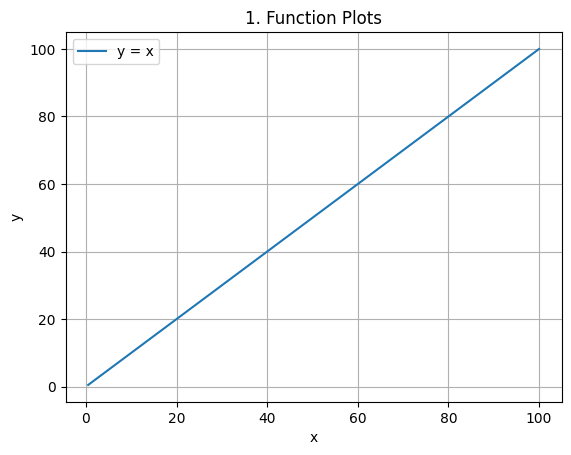

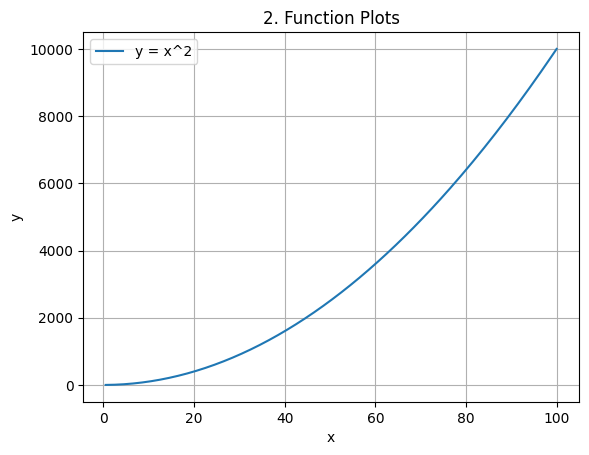

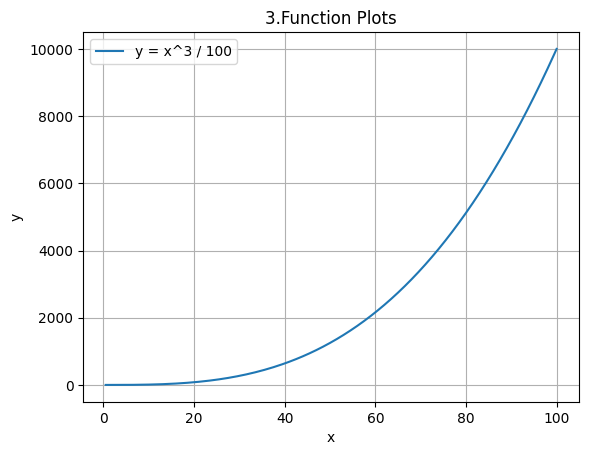

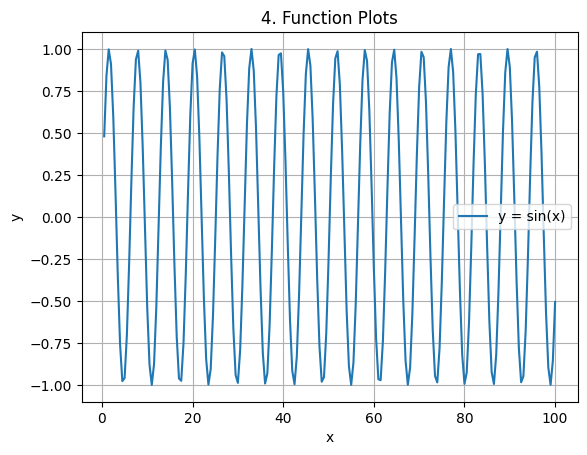

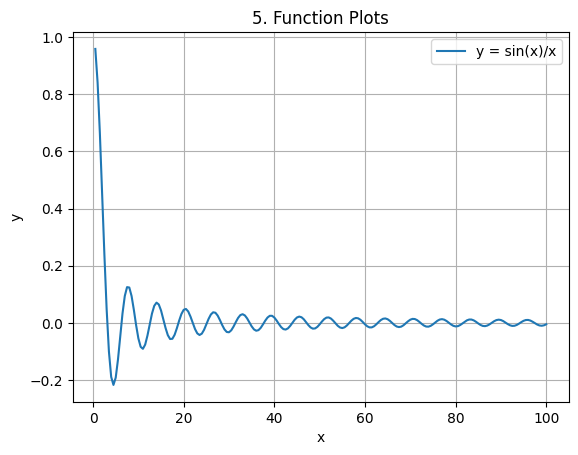

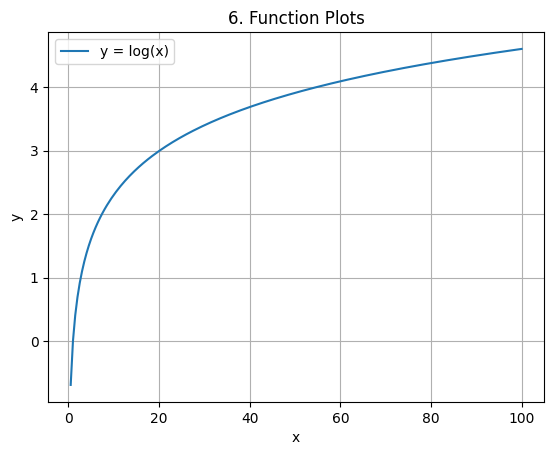

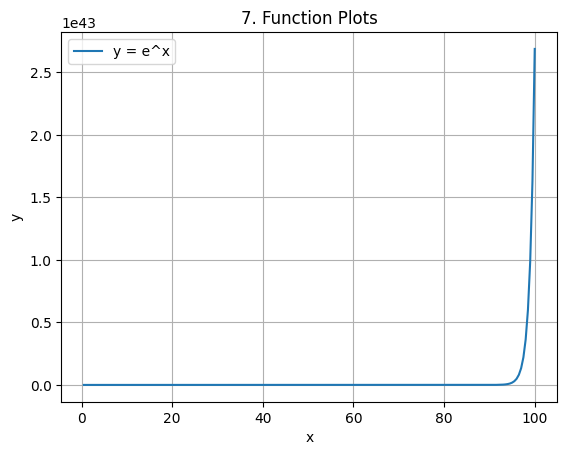

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create x values from 0.5 to 100.0 in steps of 0.5
x=np.arange(0.5,100.5,0.5)

# Compute y values for each function
y1=x
y2=x**2
y3=(x**3)/100
y4=np.sin(x)
y5=np.sin(x)/x
y6=np.log(x)
y7=np.exp(x)

# Plot
plt.plot(x,y1,label="y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("1. Function Plots")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,y2,label="y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("2. Function Plots")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,y3,label="y = x^3 / 100")
plt.xlabel("x")
plt.ylabel("y")
plt.title("3.Function Plots")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,y4,label="y = sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("4. Function Plots")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,y5,label="y = sin(x)/x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("5. Function Plots")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,y6,label="y = log(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("6. Function Plots")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,y7,label="y = e^x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("7. Function Plots")
plt.legend()
plt.grid(True)
plt.show()

**Q10] Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [ ]:
import numpy as np
import pandas as pd

# Create random 20x5 matrix with values from 1 to 2
matrix=np.random.uniform(1,2,(20,5))

# Create DataFrame
df=pd.DataFrame(matrix,columns=["a","b","c","d","e"])

# Find column with highest standard deviation
col_std=df.std()
highest_std_col=col_std.idxmax()

# Find row with lowest mean
row_mean=df.mean(axis=1)
lowest_mean_row=row_mean.idxmin()

print("DataFrame:\n",df)
print("\nColumn with highest standard deviation:",highest_std_col)
print("Row with lowest mean (index):",lowest_mean_row)


DataFrame:
            a         b         c         d         e
0   1.568071  1.485930  1.947401  1.615954  1.048369
1   1.988153  1.006654  1.376887  1.861296  1.512520
2   1.162876  1.867136  1.067775  1.855891  1.186131
3   1.078721  1.857568  1.595328  1.228181  1.932845
4   1.429075  1.169895  1.440108  1.416535  1.405207
5   1.751253  1.747739  1.560337  1.542566  1.730777
6   1.376561  1.513510  1.277529  1.337019  1.649574
7   1.509769  1.458994  1.401908  1.962395  1.523842
8   1.621264  1.270138  1.118380  1.852743  1.693925
9   1.389114  1.482867  1.016731  1.020480  1.831278
10  1.573356  1.519459  1.577361  1.565571  1.416167
11  1.319472  1.948794  1.241095  1.697786  1.083980
12  1.014528  1.230309  1.425218  1.865654  1.099634
13  1.543292  1.199569  1.168290  1.031555  1.903809
14  1.644739  1.582942  1.124534  1.762271  1.576536
15  1.369874  1.018786  1.427957  1.783015  1.896203
16  1.660880  1.844000  1.952944  1.494028  1.257160
17  1.945159  1.385995  1.262036  

**Q11]Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
# Step 3: Create column 'f' as sum of columns a-e
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

# Step 4: Create column 'g' with LT8 if f < 8, else GT8
g_values = []  # empty list to store results
for value in df["f"]:
    if value < 8:
        g_values.append("LT8")
    else:
        g_values.append("GT8")
df["g"] = g_values

# Step 5: Count number of rows where g is LT8
lt8_count = (df["g"] == "LT8").sum()

# Step 6: Find std deviation of 'f' for LT8
lt8_rows = df.loc[df["g"] == "LT8"]
lt8_std = lt8_rows["f"].std()

# Step 7: Find std deviation of 'f' for GT8
gt8_rows = df.loc[df["g"] == "GT8"]
gt8_std = gt8_rows["f"].std()

# Step 8: Print results
print("DataFrame:\n", df)
print()
print("Number of rows where g is LT8:", lt8_count)
print("Standard deviation of f for LT8:", lt8_std)
print("Standard deviation of f for GT8:", gt8_std)


DataFrame:
            a         b         c         d         e         f    g
0   1.568071  1.485930  1.947401  1.615954  1.048369  7.665724  LT8
1   1.988153  1.006654  1.376887  1.861296  1.512520  7.745511  LT8
2   1.162876  1.867136  1.067775  1.855891  1.186131  7.139809  LT8
3   1.078721  1.857568  1.595328  1.228181  1.932845  7.692642  LT8
4   1.429075  1.169895  1.440108  1.416535  1.405207  6.860820  LT8
5   1.751253  1.747739  1.560337  1.542566  1.730777  8.332672  GT8
6   1.376561  1.513510  1.277529  1.337019  1.649574  7.154192  LT8
7   1.509769  1.458994  1.401908  1.962395  1.523842  7.856908  LT8
8   1.621264  1.270138  1.118380  1.852743  1.693925  7.556450  LT8
9   1.389114  1.482867  1.016731  1.020480  1.831278  6.740470  LT8
10  1.573356  1.519459  1.577361  1.565571  1.416167  7.651914  LT8
11  1.319472  1.948794  1.241095  1.697786  1.083980  7.291128  LT8
12  1.014528  1.230309  1.425218  1.865654  1.099634  6.635342  LT8
13  1.543292  1.199569  1.168290  1.

**Q12]Write a small piece of code to explain broadcasting in numpy.**

In [ ]:
import numpy as np

# A 2D array (matrix) of shape (3, 3)
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# A 1D array (vector) of shape (3,)
b = np.array([10, 20, 30])

# Broadcasting: adding a 1D array to each row of a 2D array
result = A + b

print("Matrix A:\n", A)
print("\nVector b:\n", b)
print("\nResult of A + b (broadcasting):\n", result)


Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector b:
 [10 20 30]

Result of A + b (broadcasting):
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


How it works:
A has shape (3, 3).

b has shape (3,).

NumPy automatically stretches b along the rows to match (3, 3) before performing addition — without actually copying the data.

This is called broadcasting.

**Q13] Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**



In [ ]:
import numpy as np

def my_argmin(arr):
    # Ensure arr is a numpy array
    arr = np.asarray(arr)

    # Initialize with the first element
    min_index = 0
    min_value = arr[0]

    # Loop through the array to find the minimum
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

# Example usage 1:
arr = np.array([5, 2, 8, 1, 3])
print("My argmin:", my_argmin(arr))
print("Numpy argmin:", np.argmin(arr))


# Example usage 2:
arr2 = np.array([5, 23, 1, -2, -8])
print("My argmin:", my_argmin(arr2))
print("Numpy argmin:", np.argmin(arr2))

My argmin: 3
Numpy argmin: 3
My argmin: 4
Numpy argmin: 4
